In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)

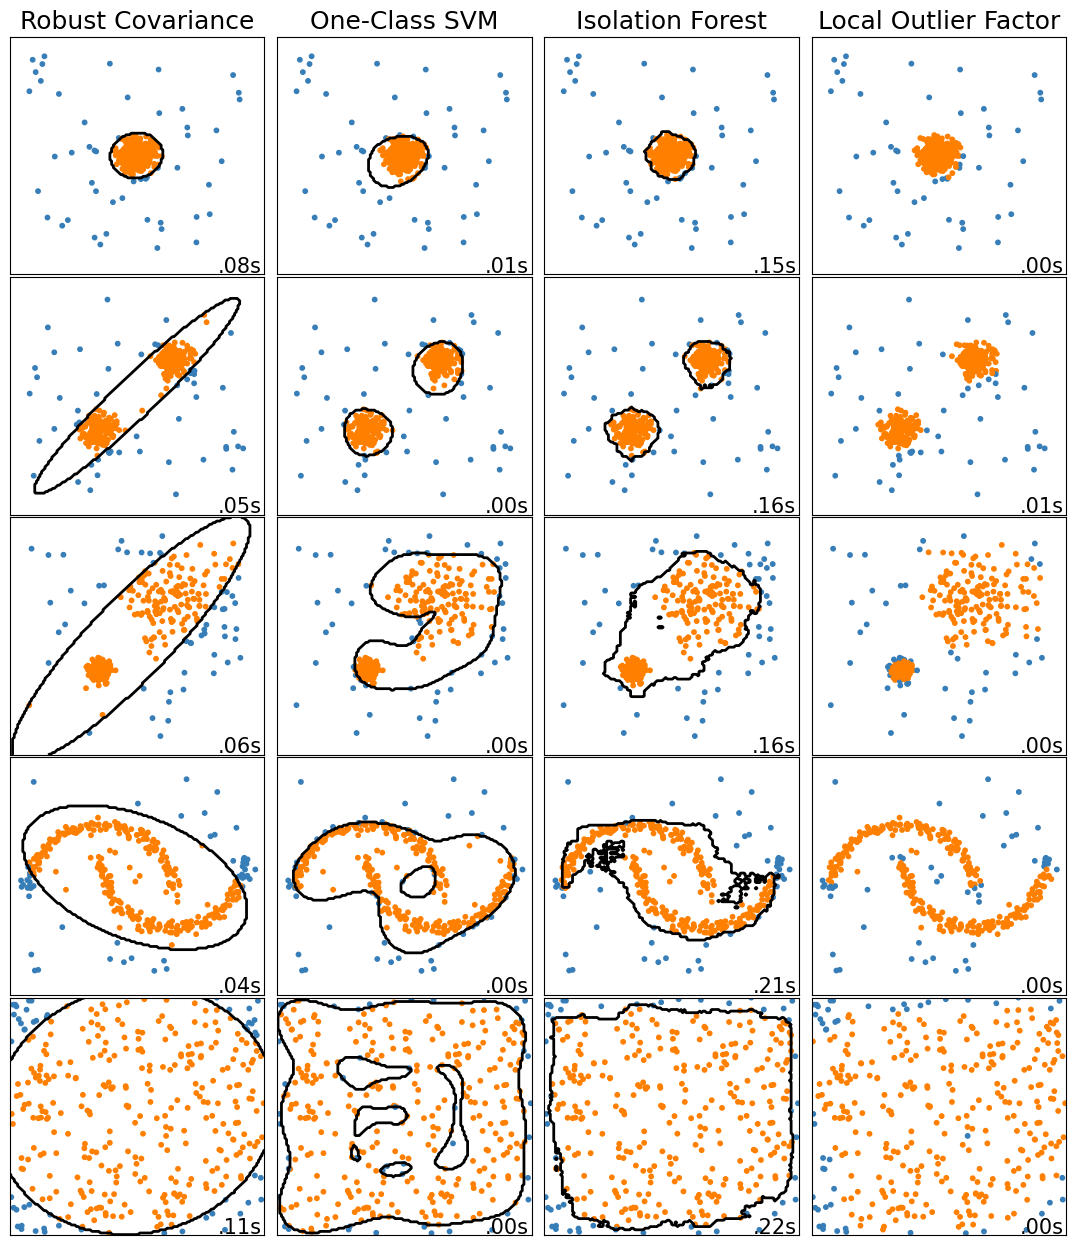

In [410]:
# Outlier Detection
from sklearn.datasets import make_blobs,make_moons
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from time import time

np.random.seed(0)

#mpl.rcParams['contour.negative_linestyle'] = 'solid'

#dataset instance setting
n_samples=300
outlier_fraction=.15
n_outliers=int(n_samples*outlier_fraction)
n_inliers=n_samples-n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms=[
    ('Robust Covariance',EllipticEnvelope(contamination=outlier_fraction)),
    ('One-Class SVM',svm.OneClassSVM(kernel='rbf',gamma=.1,nu=outlier_fraction)),
    ('Isolation Forest',IsolationForest(contamination=outlier_fraction)),
    ('Local Outlier Factor',LocalOutlierFactor(contamination=outlier_fraction,n_neighbors=30))
]

# define datasets
blobs_params=dict(random_state=0,n_samples=n_samples,n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,**blobs_params)[0],
    
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],**blobs_params)[0],
    
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],**blobs_params)[0],
    
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -np.array([0.5, 0.25])),
    
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx,yy=np.meshgrid(np.linspace(-7,7,150),np.linspace(-7,7,150))


plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset,x in enumerate(datasets):
    #add outliers
    x=np.concatenate([x,rng.uniform(low=-6,high=6,size=(n_outliers,2))],axis=0)

    for name,algorithm in anomaly_algorithms:
        t0=time()
        algorithm.fit(x)
        t1=time()-t0
        plt.subplot(len(datasets),len(anomaly_algorithms),plot_num)
        
        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(x)##################
        else:
            y_pred = algorithm.fit(x).predict(x)################
           
        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])###################
            z = z.reshape(xx.shape)
            plt.contour(xx, yy, z,  levels=[0],linewidths=2, colors='black')
            
        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(x[:, 0], x[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        
        if i_dataset == 0:
            plt.title(name, size=18)
        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 )).lstrip('0'),transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1










In [16]:
n_outliers

45

In [17]:
n_inliers

255

In [20]:
blobs_params

{'random_state': 0, 'n_samples': 255, 'n_features': 2}

In [24]:
anomaly_algorithms

[('Robust Covariance', EllipticEnvelope(contamination=0.15)),
 ('One-Class SVM', OneClassSVM(gamma=0.1, nu=0.15)),
 ('Isolation Forest', IsolationForest(contamination=0.15)),
 ('Local Outlier Factor',
  LocalOutlierFactor(contamination=0.15, n_neighbors=30))]

In [27]:
len(datasets)

5

In [37]:
(datasets[3]).shape

(300, 2)

In [121]:
for data in datasets:
    print(pd.DataFrame(data).describe())
    print()

                0           1
count  300.000000  300.000000
mean    -0.042732   -0.012218
std      0.506265    0.498419
min     -1.329586   -1.523072
25%     -0.370430   -0.330394
50%     -0.066646    0.009453
75%      0.324541    0.306003
max      1.348112    1.206227

                0           1
count  300.000000  300.000000
mean    -0.042732   -0.012218
std      2.092282    2.117749
min     -3.329586   -3.523072
25%     -2.093227   -2.042609
50%      0.035809   -0.090035
75%      1.948986    2.045333
max      3.191572    3.120447

                0           1
count  300.000000  300.000000
mean    -0.044637    0.044702
std      2.279442    2.347853
min     -2.797752   -2.913843
25%     -2.055936   -2.032385
50%     -1.293878   -1.329044
75%      1.846959    2.136000
max      5.574717    5.361340

                0           1
count  300.000000  300.000000
mean    -0.023914   -0.021903
std      3.471807    2.011614
min     -6.391920   -3.411997
25%     -2.163192   -1.909769
50%    

In [125]:
xx.shape,yy.shape

((150, 150), (150, 150))

In [124]:
i_dataset

4

In [123]:
(datasets[0]).shape

(300, 2)

In [122]:
x.shape

(345, 2)

In [140]:
set(y_pred)

{-1, 1}

Text(0.5, 0, 'train error: 20/200 ; regular novel error: 2/40 ; abnormal novelty error: 2/40')

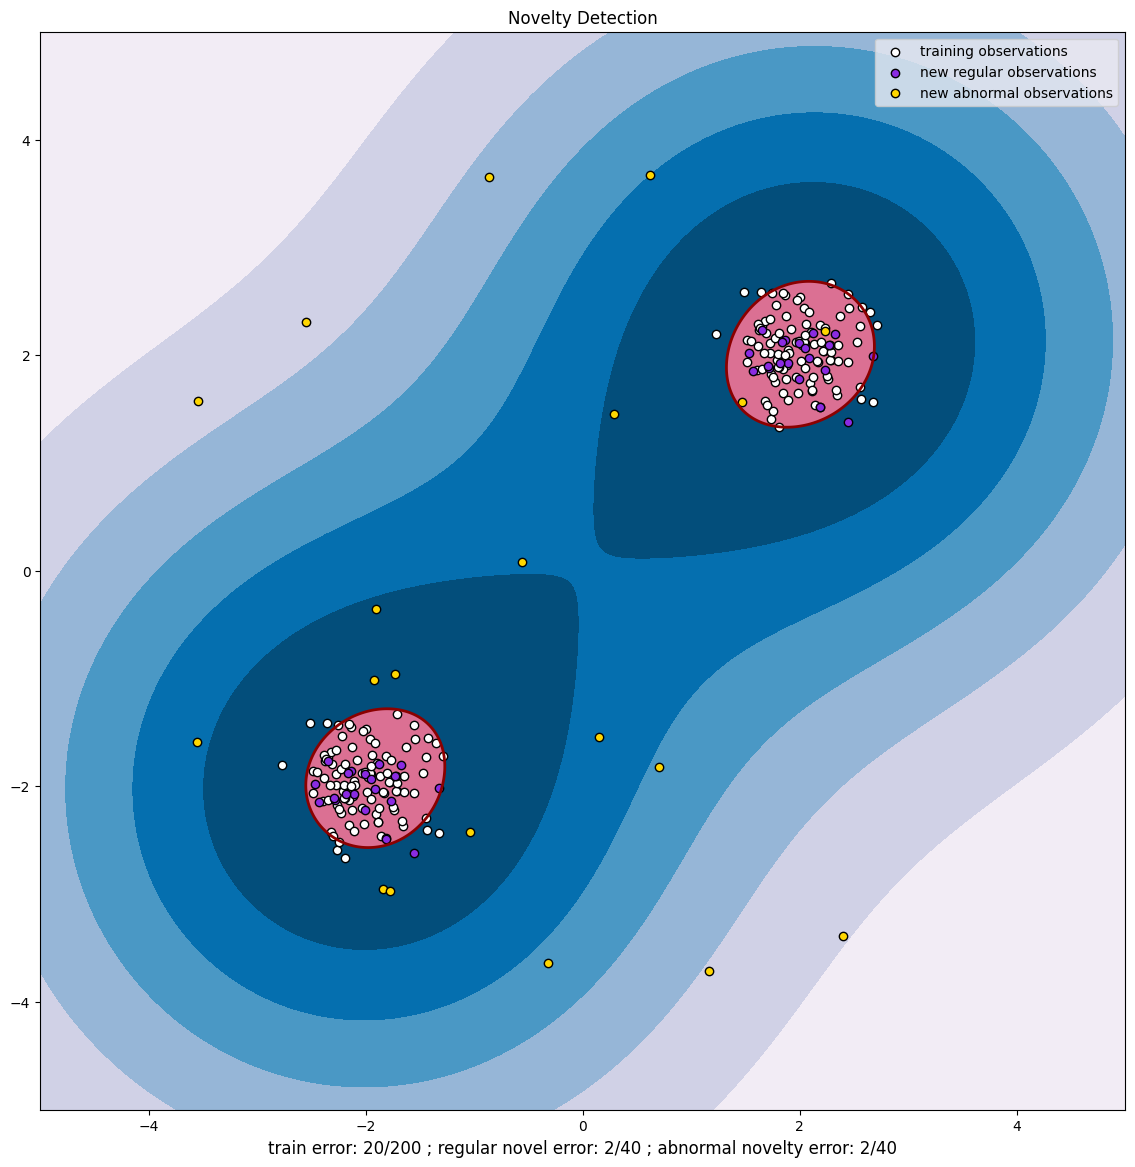

In [80]:
# Novelty Detection
from sklearn import svm
from matplotlib import font_manager

np.random.seed(0)

#generate train data
x=.3*np.random.randn(100,2)
x_train=np.r_[x+2,x-2]
# Generate some regular novel observations
x=.3*np.random.randn(20,2)
x_test=np.r_[x+2,x-2]
# Generate some abnormal novel observations
x_outlier=np.random.uniform(low=-4,high=4,size=(20,2))

#fit the model
clf=svm.OneClassSVM(kernel='rbf',gamma=.1,nu=.1)
clf.fit(x_train)
y_pred_train=clf.predict(x_train)################
y_pred_test=clf.predict(x_test)#################
y_pred_outlier=clf.predict(x_outlier)################3
n_error_train=y_pred_train[y_pred_train==-1].size
n_error_test=y_pred_test[y_pred_test==-1].size
n_error_outlier=y_pred_outlier[y_pred_outlier==1].size

# plot the line, the points, and the nearest vectors to the plane
xx,yy=np.meshgrid(np.linspace(-5,5,500),np.linspace(-5,5,500))
z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])################
z=z.reshape(xx.shape)

plt.figure(figsize=(14, 14))
plt.title("Novelty Detection")
plt.contourf(xx, yy, z,levels=np.linspace(z.min(), 0, 7)  ,cmap=plt.cm.PuBu)
a=plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, z, levels=[0,z.max()], colors='palevioletred')

b1=plt.scatter(x_train[:,0],x_train[:,1],c='w',edgecolors='k')
b2=plt.scatter(x_test[:,0],x_test[:,1],c='blueviolet',edgecolors='k')
c=plt.scatter(x_outlier[:,0],x_outlier[:,1],c='gold',edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.legend([ b1, b2, c],
           ["training observations","new regular observations","new abnormal observations"],
            facecolor='#eaeaf2')

plt.xlabel("train error: %d/200 ; regular novel error: %d/40 ; abnormal novelty error: %d/40"
          % (n_error_train, n_error_test, n_error_outlier),fontsize=12)

In [20]:
y_pred_train.shape

(200,)

In [21]:
y_pred_outlier

array([-1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [18]:
n_error_train

20

In [22]:
n_error_test

2

In [23]:
n_error_outlier

2

In [26]:
z.shape

(500, 500)

In [65]:
a.collections[0]

/tmp/ipykernel_384951/2371833059.py:1: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  a.collections[0]


([], [])

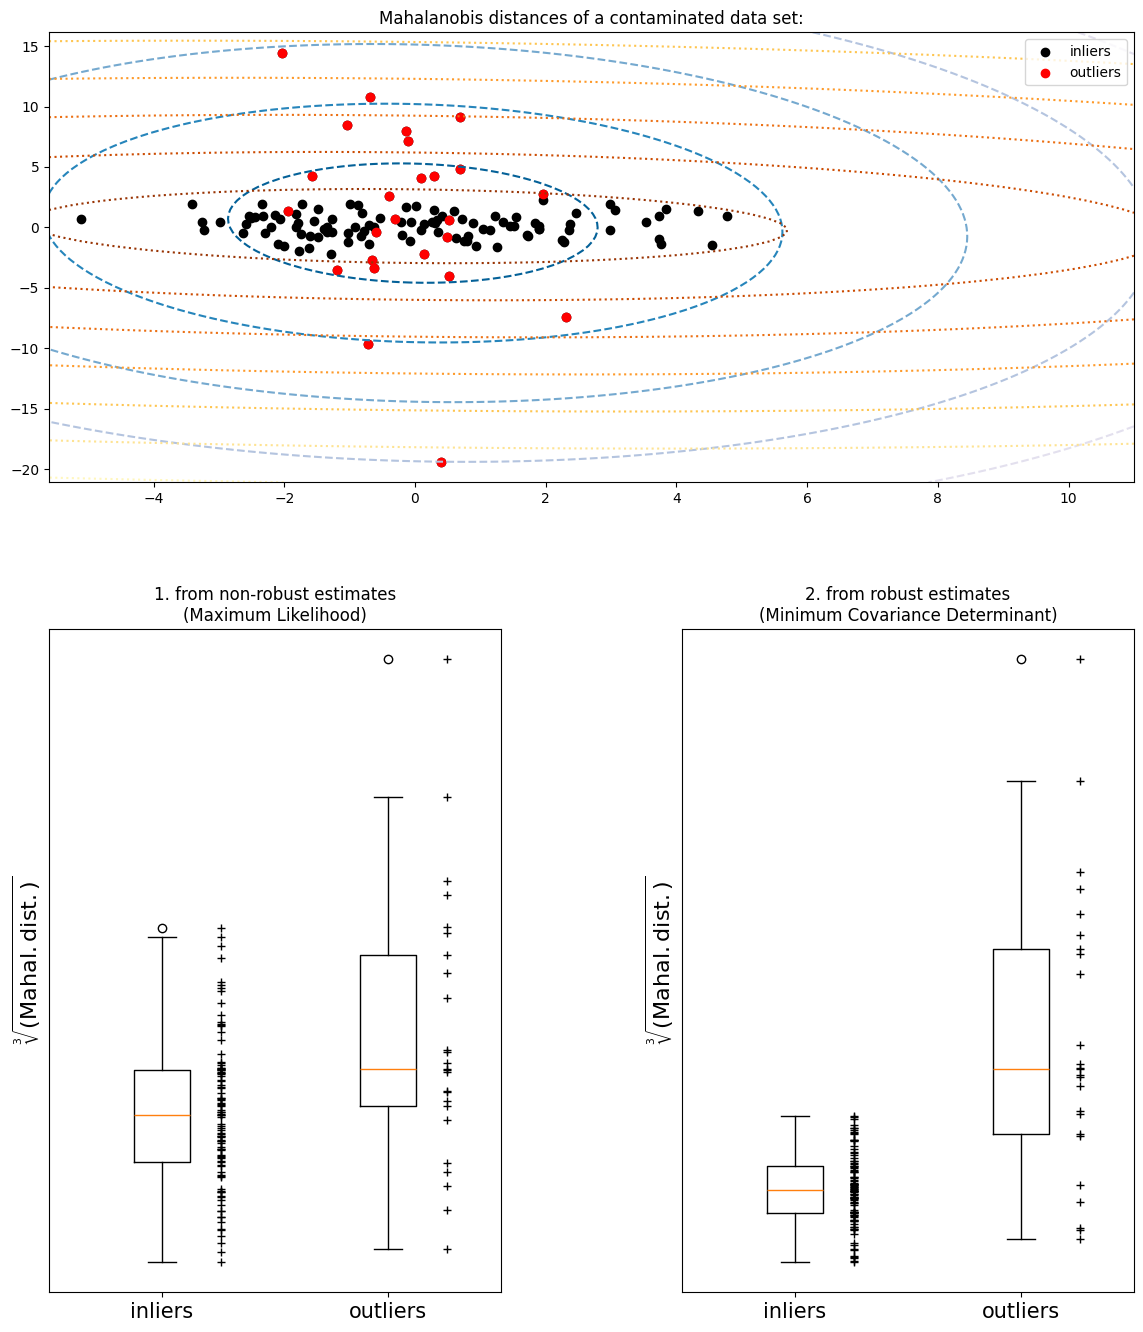

In [195]:
# Outlier Detection
from sklearn.covariance import EmpiricalCovariance,MinCovDet

np.random.seed(0)

n_samples=125
n_features=2
n_outliers=25

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
x=np.dot(np.random.randn(n_samples,n_features),gen_cov)

#adding some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
x[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov=MinCovDet().fit(x)

# compare estimators learnt from the full data set with true parameters
emp_cov=EmpiricalCovariance().fit(x)

# #############################################################################
# Display results
fig = plt.figure(figsize=(14, 14))
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot=subfig1.scatter(x[:,0],x[:,1],c='k',label='inliers')
outlier_plot=subfig1.scatter(x[:,0][-n_outliers:],x[:,1][-n_outliers:],c='r',label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx,yy=np.meshgrid(np.linspace(subfig1.get_xlim()[0],subfig1.get_xlim()[1],100),
                  np.linspace(subfig1.get_ylim()[0],subfig1.get_ylim()[1],100) )

zz=np.c_[xx.ravel(),yy.ravel()]

mahal_emp_cov=emp_cov.mahalanobis(zz)
mahal_emp_cov=mahal_emp_cov.reshape(xx.shape)
emp_cov_contour=plt.contour(xx,yy,np.sqrt(mahal_emp_cov),cmap=plt.cm.PuBu_r,linestyles='dashed')

mahal_robust_cov=robust_cov.mahalanobis(zz)
mahal_robust_cov=mahal_robust_cov.reshape(xx.shape)
robust_cov_cntour=plt.contour(xx,yy,np.sqrt(mahal_robust_cov),cmap=plt.cm.YlOrBr_r,linestyles='dotted')

subfig1.legend(['inliers','outliers','MLE distance','Robust dist'])

# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(x - np.mean(x, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)

subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(np.full(n_samples - n_outliers, 1.26),emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(np.full(n_outliers, 2.26),emp_mahal[-n_outliers:], '+k', markeredgewidth=1)

subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(x - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)

subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]], widths=.25)
subfig3.plot(np.full(n_samples - n_outliers, 1.26),robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(np.full(n_outliers, 2.26),robust_mahal[-n_outliers:], '+k', markeredgewidth=1)

subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

In [112]:
np.eye(N=4,M=4,k=0)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [96]:
gen_cov

array([[2., 0.],
       [0., 1.]])

In [144]:
x.shape

(125, 2)

In [108]:
x.max()

14.451450029515236

In [109]:
x.min()

-19.40814929498655

In [105]:
outliers_cov

array([[1., 0.],
       [0., 7.]])

In [133]:
subfig1.get_xlim()

(-5.59959309073796, 11.0)

In [134]:
subfig1.get_ylim()

(-21.10112926121164, 16.144429995740325)

In [152]:
zz.shape

(10000, 2)

In [153]:
z.shape

(100, 100)

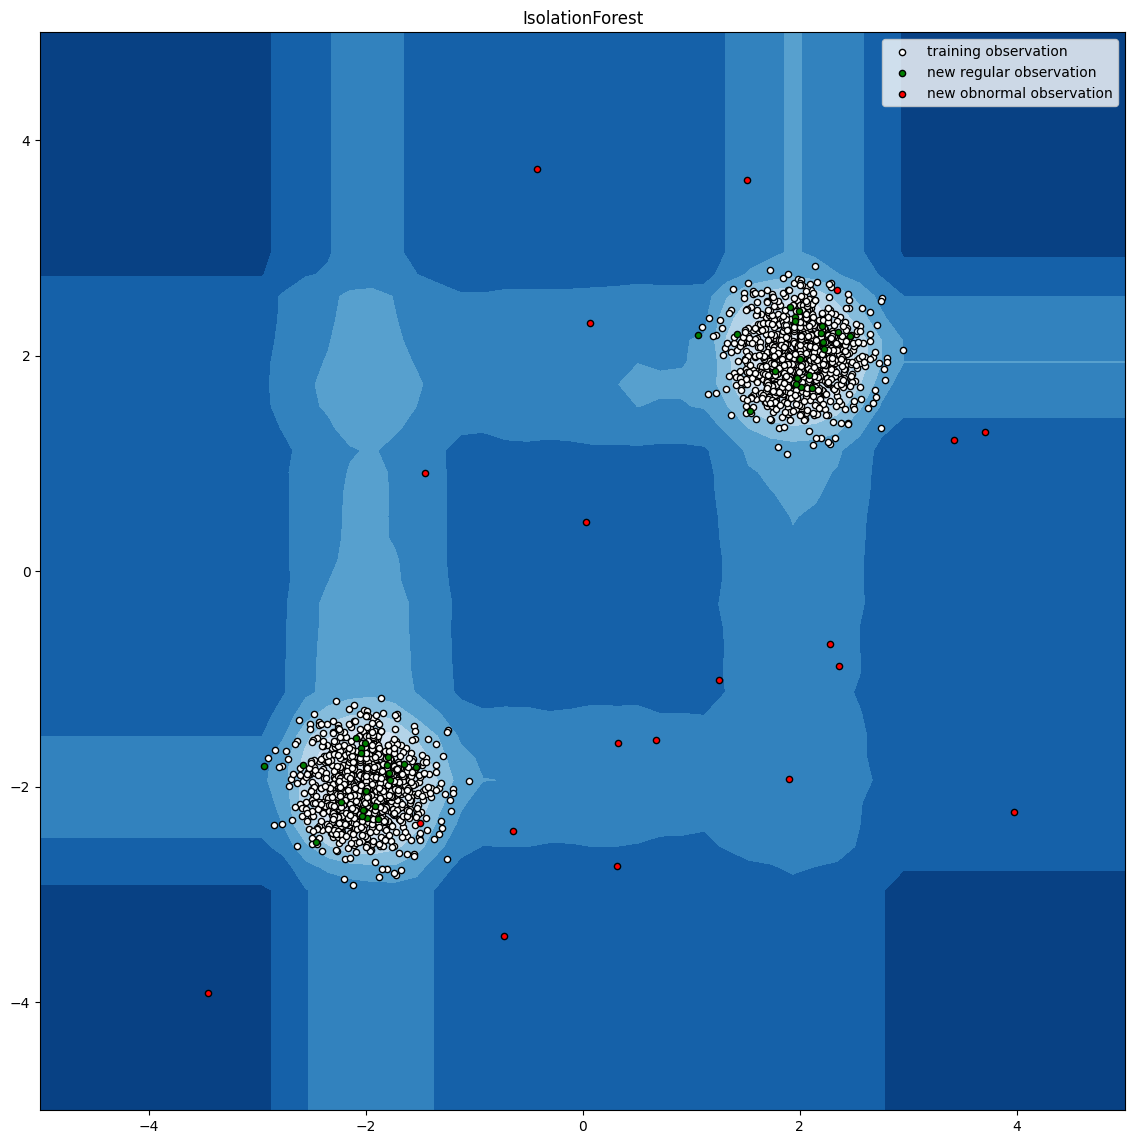

In [268]:
# Isolation Forest 
#One efficient way of performing outlier detection in high-dimensional datasets is to use random forests
from sklearn.ensemble import IsolationForest

np.random.seed(0)

#generate train date
x=np.random.randn(1000,2)*.3
x_train=np.r_[x+2,x-2]
#generate some regular novelty observation
x=np.random.randn(20,2)*.3
x_test=np.r_[x+2,x-2]
#generate some obnormal novelty observation
x_outlier=np.random.uniform(low=-4,high=4,size=(20,2))

#fit the model
clf=IsolationForest(max_samples=1000,random_state=0)
clf.fit(x_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
y_pred_outlier=clf.predict(x_outlier)

# plot the line, the samples, and the nearest vectors to the plane
xx,yy=np.meshgrid(np.linspace(-5,5,50),np.linspace(-5,5,50))
zz=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
z=zz.reshape(xx.shape)

plt.figure(figsize=(14, 14))
plt.title("IsolationForest")
plt.contourf(xx,yy,z,cmap=plt.cm.Blues_r)

plt.scatter(x_train[:,0],x_train[:,1],c='w',edgecolors='k',s=20,label='training observation')
plt.scatter(x_test[:,0],x_test[:,1],c='g',edgecolors='k',s=20,label='new regular observation')
plt.scatter(x_outlier[:,0],x_outlier[:,1],c='r',edgecolors='k',s=20,label='new obnormal observation')

plt.legend()

In [246]:
x.max()

0.4665342096177203

In [247]:
x.min()

-0.9350569774797377

In [248]:
x_train.max()

2.9512924319870537

In [249]:
x_train.min()

-2.913842916439978

In [210]:
x_train.shape

(2000, 2)

In [211]:
x_test.shape

(40, 2)

In [214]:
x_outlier.shape

(20, 2)

In [217]:
y_pred_train.shape

(2000,)

In [224]:
clf.estimator_

ExtraTreeRegressor(max_depth=10, max_features=1, random_state=0)

In [242]:
len(clf.estimators_)

100

In [240]:
len(clf.estimators_features_)

100

In [238]:
len(clf.estimators_samples_)

100

In [243]:
(clf.max_samples_)

1000

In [244]:
(clf.n_features_in_)

2

In [245]:
(clf.offset_)

-0.5

In [251]:
zz.shape

(2500,)

In [252]:
z.shape

(50, 50)

In [275]:
y_pred_train[y_pred_train==-1].size

389

In [276]:
y_pred_test[y_pred_test==-1].size

6

In [278]:
y_pred_outlier[y_pred_outlier!=-1].size

0

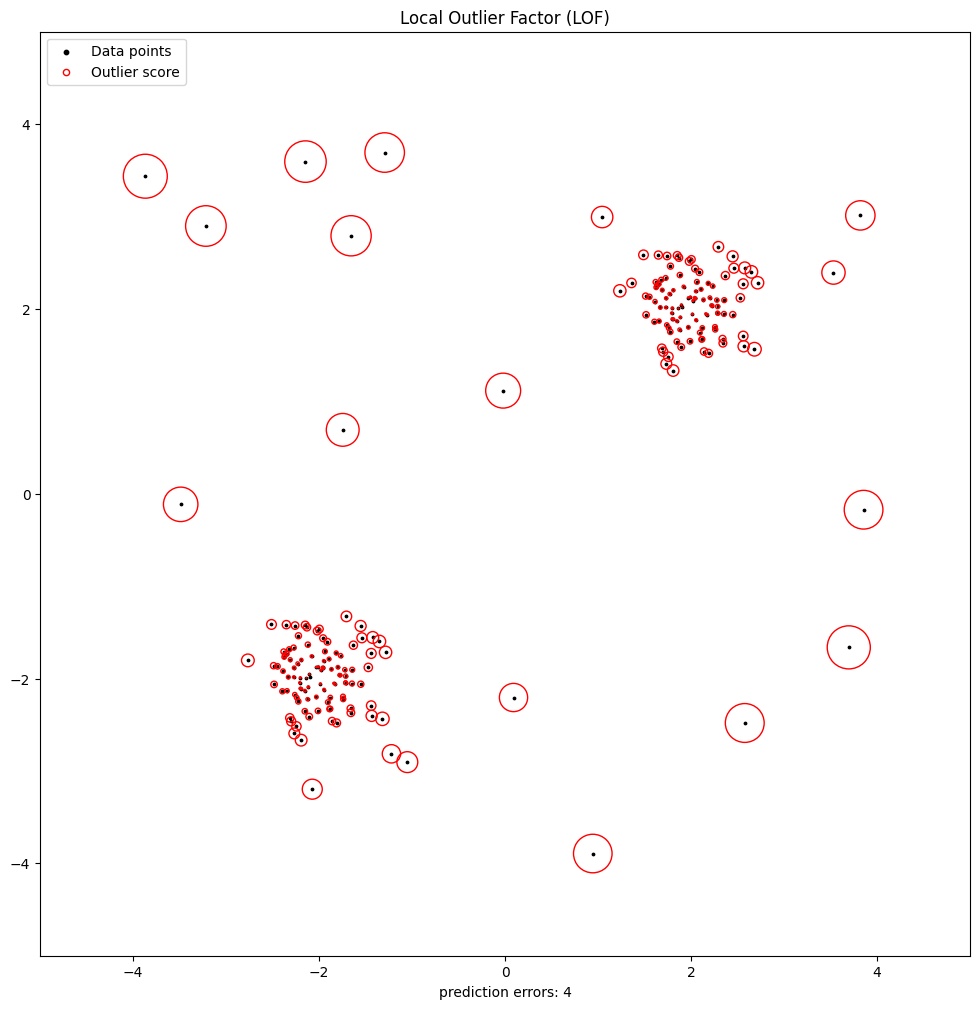

In [409]:
#outlier detection with Local outlier Factor
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(0)

#generate inlier data
x_inlier=np.random.randn(100,2)*.3
x_inlier=np.r_[x_inlier-2,x_inlier+2]
#generate outlier data
x_outlier=np.random.uniform(low=-4,high=4,size=(20,2))
#generate training data
x=np.r_[x_inlier,x_outlier]

n_outliers=len(x_outlier)
ground_truth=np.ones(len(x),dtype=np.int8)
ground_truth[-n_outliers:]=-1

# fit the model for outlier detection (default)
clf=LocalOutlierFactor(n_neighbors=20,contamination=.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred=clf.fit_predict(x)
n_errors=(y_pred!=ground_truth).sum()
x_scores=clf.negative_outlier_factor_

#plot the results
plt.figure(figsize=(12,12))
plt.title('Local Outlier Factor (LOF)')
plt.scatter(x[:,0],x[:,1],c='k',s=3,label='Data points')

# plot circles with radius proportional to the outlier scores
radius=radius = (x_scores.max() - x_scores) / (x_scores.max() - x_scores.min())
x_scores_abs=np.abs(x_scores)
plt.scatter(x[:,0],x[:,1],c='none',edgecolors='r',s=radius*1000,label='Outlier score')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legend_handles[0]._sizes = [10]
legend.legend_handles[1]._sizes = [20]

In [310]:
x_inlier.max()

2.7149434324591826

In [311]:
x_inlier.min()

-2.7658969447502235

In [312]:
x_outlier.min()

-3.894105137928804

In [313]:
x_outlier.max()

3.8546351185460255

In [315]:
x.shape

(220, 2)

In [317]:
n_outliers

20

In [320]:
ground_truth.shape

(220,)

In [329]:
type(ground_truth)

numpy.ndarray

In [330]:
type(ground_truth[0])

numpy.int8

In [331]:
ground_truth

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int8)

In [332]:
x

array([[-1.4707843 , -1.87995284],
       [-1.7063786 , -1.32773204],
       [-1.4397326 , -2.29318336],
       [-1.71497347, -2.04540716],
       [-2.03096566, -1.87682045],
       [-1.95678693, -1.56371795],
       [-1.77168868, -1.9634975 ],
       [-1.86684103, -1.8998977 ],
       [-1.55177628, -2.06154748],
       [-1.90607969, -2.25622872],
       [-2.76589694, -1.80391442],
       [-1.74066914, -2.22264951],
       [-1.31907361, -2.4363097 ],
       [-1.98627244, -2.05615516],
       [-1.54016624, -1.55919237],
       [-1.95351577, -1.88655124],
       [-2.26633572, -2.59423894],
       [-2.10437364, -1.95309531],
       [-1.6309128 , -1.63928605],
       [-2.11619805, -2.09069083],
       [-2.31456589, -2.42600538],
       [-2.51188106, -1.41476738],
       [-2.15289565, -2.13142229],
       [-2.37583861, -1.76675289],
       [-2.48416935, -2.06382208],
       [-2.26863997, -1.88392925],
       [-2.15324154, -2.35418966],
       [-2.00845467, -1.87150044],
       [-1.98004483,

In [340]:
n_error

4

In [343]:
clf.negative_outlier_factor_.shape

(220,)

In [344]:
clf.effective_metric_

'euclidean'

In [345]:
clf.effective_metric_params_

{}

In [348]:
clf.n_features_in_

2

In [349]:
clf.n_neighbors_

20

In [350]:
clf.n_samples_fit_

220

In [351]:
clf.offset_

-1.550643256546396

In [374]:
clf.negative_outlier_factor_

array([-1.21526994, -1.37737228, -1.29379028, -0.9994125 , -0.95064908,
       -1.12459879, -0.98273885, -0.98791362, -1.0940133 , -1.03081566,
       -1.5716534 , -1.04791443, -1.6442779 , -0.95598229, -1.32598933,
       -0.97109464, -1.39830915, -0.95050947, -1.2062911 , -0.96320754,
       -1.21828622, -1.31125743, -0.97060103, -1.02159381, -1.10799094,
       -0.9916919 , -1.06179388, -0.95795257, -0.95985286, -0.96298069,
       -0.96581212, -1.28517333, -0.97317116, -1.09512322, -0.97027507,
       -0.98075357, -1.16933251, -1.02048223, -1.01570359, -0.94459843,
       -1.03370424, -1.15589104, -1.41797811, -1.03694805, -1.04430307,
       -1.0506036 , -1.03020786, -0.99747171, -1.17008627, -0.97048721,
       -1.42576115, -1.0595216 , -1.21049772, -0.98720484, -1.4880337 ,
       -1.3274062 , -1.16271883, -0.97800226, -0.99875853, -1.00655058,
       -1.06467081, -1.11651135, -0.9616236 , -1.15407589, -0.99151673,
       -0.98901384, -0.95716845, -0.97934754, -0.96582556, -1.05

In [375]:
radius

array([3.60852394e-02, 5.76963133e-02, 4.65533733e-02, 7.30767192e-03,
       8.06656779e-04, 2.39971918e-02, 5.08478329e-03, 5.77467104e-03,
       1.99196114e-02, 1.14942629e-02, 8.35973810e-02, 1.37738266e-02,
       9.32794951e-02, 1.51766717e-03, 5.08460688e-02, 3.53240774e-03,
       6.04875639e-02, 7.88044300e-04, 3.48882043e-02, 2.48091914e-03,
       3.64873624e-02, 4.88820485e-02, 3.46660033e-03, 1.02648290e-02,
       2.17830749e-02, 6.27838176e-03, 1.56241997e-02, 1.78033900e-03,
       2.03368197e-03, 2.45067645e-03, 2.82815442e-03, 4.54045829e-02,
       3.80924294e-03, 2.00675831e-02, 3.42314386e-03, 4.82011120e-03,
       2.99609781e-02, 1.01166361e-02, 9.47955973e-03, 0.00000000e+00,
       1.18793599e-02, 2.81689948e-02, 6.31097805e-02, 1.23118169e-02,
       1.32923691e-02, 1.41323406e-02, 1.14132320e-02, 7.04893190e-03,
       3.00614678e-02, 3.45142643e-03, 6.41473957e-02, 1.53212657e-02,
       3.54490191e-02, 5.68017880e-03, 7.24494136e-02, 5.10349617e-02,
      

In [400]:
np.abs(x_scores)

array([1.21526994, 1.37737228, 1.29379028, 0.9994125 , 0.95064908,
       1.12459879, 0.98273885, 0.98791362, 1.0940133 , 1.03081566,
       1.5716534 , 1.04791443, 1.6442779 , 0.95598229, 1.32598933,
       0.97109464, 1.39830915, 0.95050947, 1.2062911 , 0.96320754,
       1.21828622, 1.31125743, 0.97060103, 1.02159381, 1.10799094,
       0.9916919 , 1.06179388, 0.95795257, 0.95985286, 0.96298069,
       0.96581212, 1.28517333, 0.97317116, 1.09512322, 0.97027507,
       0.98075357, 1.16933251, 1.02048223, 1.01570359, 0.94459843,
       1.03370424, 1.15589104, 1.41797811, 1.03694805, 1.04430307,
       1.0506036 , 1.03020786, 0.99747171, 1.17008627, 0.97048721,
       1.42576115, 1.0595216 , 1.21049772, 0.98720484, 1.4880337 ,
       1.3274062 , 1.16271883, 0.97800226, 0.99875853, 1.00655058,
       1.06467081, 1.11651135, 0.9616236 , 1.15407589, 0.99151673,
       0.98901384, 0.95716845, 0.97934754, 0.96582556, 1.05575035,
       1.06090609, 0.97189648, 1.53584793, 1.04208535, 1.04860

(-5.0, 5.0)

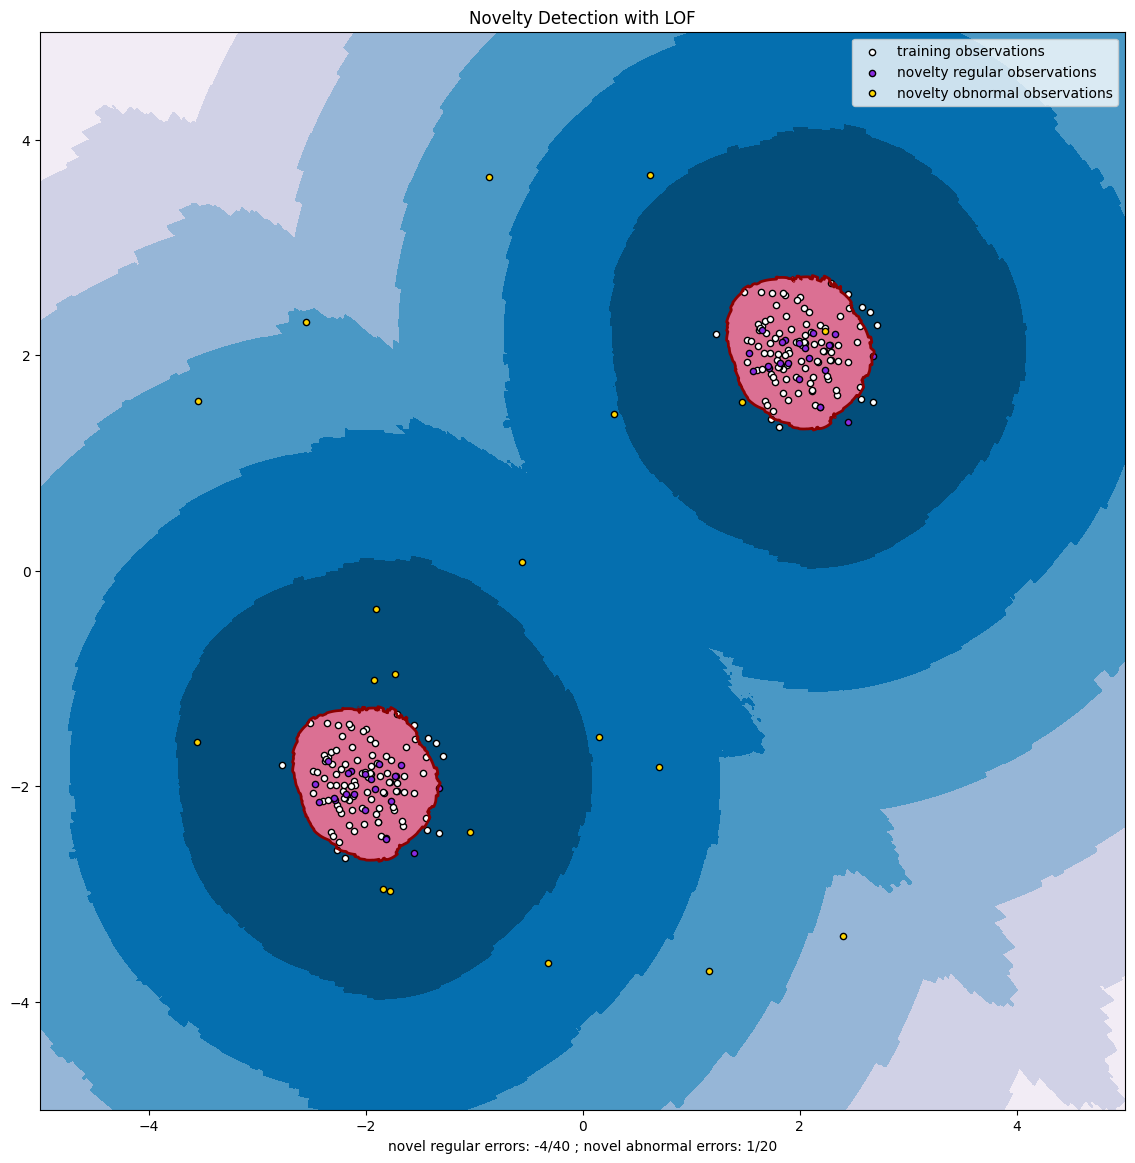

In [533]:
# novelty detection with Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(0)

#generate normal training observation
x_train=np.random.randn(100,2)*.3
x_train=np.r_[x_train-2,x_train+2]
#generate new normal observation
x_test=np.random.randn(20,2)*.3
x_test=np.r_[x_test-2,x_test+2]
#generate new obnormal observation
x_outlier=np.random.uniform(low=-4,high=4,size=(20,2))

# fit the model for novelty detection (novelty=True)
clf=LocalOutlierFactor(n_neighbors=20,contamination=.1,novelty=True)
clf.fit(x_train)

# DO NOT use predict, decision_function and score_samples on X_train as this
# would give wrong results but only on new unseen data (not used in X_train),
# e.g. X_test, X_outliers or the meshgrid
y_pred_test=clf.predict(x_test)
y_pred_outlier=clf.predict(x_outlier)

n_error_test=y_pred_test[y_pred_test==-1].sum()
n_error_outlier=y_pred_outlier[y_pred_outlier==1].sum()

# plot the learned frontier, the points, and the nearest vectors to the plane
xx,yy=np.meshgrid(np.linspace(-5,5,1000),np.linspace(-5,5,1000))
zz=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])######################
z=zz.reshape(xx.shape)

plt.figure(figsize=(14, 14))
plt.title("Novelty Detection with LOF")
plt.contourf(xx,yy,z,cmap=plt.cm.PuBu,levels=np.linspace(z.min(),0,7))
plt.contour(xx,yy,z,colors='darkred',linewidths=2,levels=[0])
plt.contourf(xx,yy,z,colors='palevioletred',levels=[0,z.max()])

plt.scatter(x_train[:,0],x_train[:,1],c='w',edgecolors='k',s=20,label="training observations")
plt.scatter(x_test[:,0],x_test[:,1],c='blueviolet',edgecolors='k',s=20,label="novelty regular observations")
plt.scatter(x_outlier[:,0],x_outlier[:,1],c='gold',edgecolors='k',s=20,label="novelty obnormal observations")

plt.xlabel("novel regular errors: %d/40 ; novel abnormal errors: %d/20"% (n_error_test, n_error_outlier))
plt.legend()
#plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

In [525]:
x_test.shape

(40, 2)

In [526]:
x_outlier.shape

(20, 2)

In [527]:
y_pred_test.shape

(40,)

In [528]:
y_pred_outlier.shape

(20,)

In [529]:
n_error_test

-4

In [530]:
n_error_outlier

1

In [471]:
y_pred_test

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [482]:
np.linspace(z.min(),0,7)

array([-19.077603 , -15.8980025, -12.718402 ,  -9.5388015,  -6.359201 ,
        -3.1796005,   0.       ])

In [483]:
z.min()

-19.0776029984406

In [484]:
z.max()

0.3948208660392134

In [485]:
z.shape

(1000, 1000)

In [535]:
zz=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])######################
print(z.min(),z.max())


-19.0776029984406 0.3948208660392134



In [536]:
zz=clf.score_samples(np.c_[xx.ravel(),yy.ravel()])######################
print(z.min(),z.max())



-19.0776029984406 0.3948208660392134


In [537]:
zz=clf.predict(np.c_[xx.ravel(),yy.ravel()])######################
print(z.min(),z.max())

-19.0776029984406 0.3948208660392134
